In [1]:
import pandas as pd
import numpy as np
import keras

Using TensorFlow backend.


In [2]:
np.random.seed(2)

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
## Data exploration

## Data exploration

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre-processing

In [6]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
data = data.drop(['Time'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [10]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class'] 

In [14]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [16]:
X_train.shape

(199364, 29)

In [17]:
X_test.shape

(85443, 29)

In [18]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Dropout layer used in an attempt to avoid overfitting

In [ ]:
model = Sequential([
    Dense(units = 16,input_dim = 29,activation = 'relu'),
    Dense(units = 24,activation = 'relu'),
    Dropout(0.5),
    Dense(units = 20,activation = 'relu'),
    Dense(units = 24,activation = 'relu'),
    Dense(units = 1,activation = 'sigmoid'),
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

## Training

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 12s 58us/step - loss: 0.0100 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 11s 55us/step - loss: 0.0039 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 11s 55us/step - loss: 0.0035 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 11s 56us/step - loss: 0.0034 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 11s 56us/step - loss: 0.0031 - acc: 0.9994


In [25]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 14us/step


In [26]:
print(score)

[0.004578987968460057, 0.9993914071369217]


## Confusion Matrix

In [27]:
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [79]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [80]:
cnf_matrix = confusion_matrix(y_test, y_pred.round().astype(int))

In [81]:
print(cnf_matrix)

[[85283    13]
 [   39   108]]


plot_confusion_matrix(np.array(y_test), y_pred.round().astype(int), classes = unique_labels(y_test, y_pred.round().astype(int)))

Confusion matrix, without normalization
[[85283    13]
 [   39   108]]


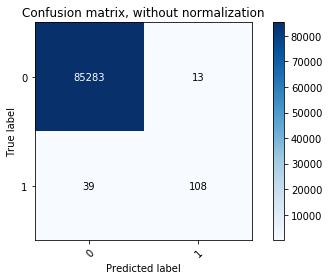

In [82]:
plot_confusion_matrix(y_test, y_pred.round(), classes = unique_labels(y_test, y_pred.round().astype(int)))

In [83]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)


Confusion matrix, without normalization
[[284279     36]
 [   137    355]]


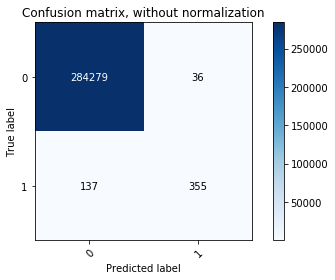

In [84]:
plot_confusion_matrix(y_expected, y_pred.round(), classes = unique_labels(y_expected, y_pred.round().astype(int)))

## Undersampling

In [87]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [88]:
normal_indices = data[data.Class == 0].index

In [89]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)

In [90]:
random_normal_indices = np.array(random_normal_indices)

In [91]:
print(len(random_normal_indices))

492


In [92]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [93]:
under_sample_data = data.iloc[under_sample_indices,:]

In [94]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [95]:
X_train_us, X_test_us, y_train_us, y_test_us= train_test_split(X_undersample, y_undersample, test_size =0.3)

In [96]:
X_train_us = np.array(X_train_us)
X_test_us = np.array(X_test_us)
y_train_us = np.array(y_train_us)
y_test_us = np.array(y_test_us)

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [98]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train_us, y_train_us, batch_size = 15, epochs = 5)

Epoch 1/5
688/688 [==============================] - 1s 1ms/step - loss: 0.6076 - acc: 0.9026
Epoch 2/5
688/688 [==============================] - 0s 153us/step - loss: 0.2994 - acc: 0.9273
Epoch 3/5
688/688 [==============================] - 0s 147us/step - loss: 0.1630 - acc: 0.9346
Epoch 4/5
688/688 [==============================] - 0s 178us/step - loss: 0.1744 - acc: 0.9404
Epoch 5/5
688/688 [==============================] - 0s 222us/step - loss: 0.1536 - acc: 0.9419


Plotting the confusion matrix with undersampling this time

Confusion matrix, without normalization
[[150   0]
 [ 21 125]]


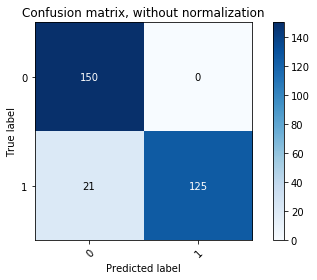

In [99]:
y_pred_us = model.predict(X_test_us)
plot_confusion_matrix(y_test_us, y_pred_us.round(), classes = unique_labels(y_test_us, y_pred_us.round().astype(int)))

## SMOTE

Applying an oversampling technique instead

In [103]:
from imblearn.over_sampling import SMOTE

In [105]:
X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())

In [107]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [108]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_resample, y_resample, test_size = 0.3)

In [109]:
X_train_os = np.array(X_train_os)
X_test_os = np.array(X_test_os)
y_train_os = np.array(y_train_os)
y_test_os = np.array(y_test_os)

In [110]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train_os, y_train_os, batch_size = 15, epochs = 5)

Epoch 1/5
398041/398041 [==============================] - 63s 158us/step - loss: 0.0344 - acc: 0.9879
Epoch 2/5
398041/398041 [==============================] - 65s 165us/step - loss: 0.0137 - acc: 0.9964
Epoch 3/5
398041/398041 [==============================] - 65s 163us/step - loss: 0.0112 - acc: 0.9972
Epoch 4/5
398041/398041 [==============================] - 63s 158us/step - loss: 0.0098 - acc: 0.9977
Epoch 5/5
398041/398041 [==============================] - 60s 151us/step - loss: 0.0088 - acc: 0.9979


Plotting the confusion matrix with oversampling for the test dataset

Confusion matrix, without normalization
[[85010   304]
 [    0 85275]]


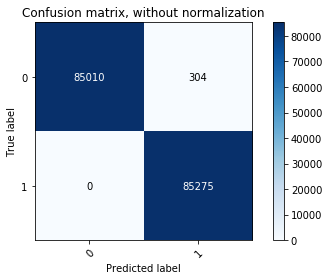

In [111]:
y_pred_os = model.predict(X_test_os)
plot_confusion_matrix(y_test_os, y_pred_os.round(), classes = unique_labels(y_test_os, y_pred_os.round().astype(int)))

Plotting the confusion matrix with oversampling for the whole dataset

Confusion matrix, without normalization
[[283264   1051]
 [     0    492]]


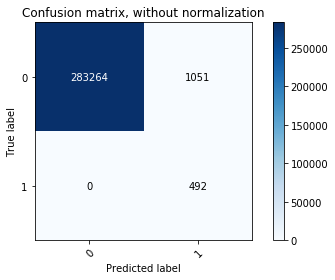

In [112]:
y_pred = model.predict(X)
plot_confusion_matrix(y, y_pred.round(), classes = unique_labels(y, y_pred.round().astype(int)))

No false positives

Trained a deep learning model with oversampling techniques to predict fraudulent credit card transactions